In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolorsx
from matplotlib.patches import Circle

import os
from glob import glob

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.nddata import Cutout2D

from reproject import reproject_exact

from AstroColour.AstroColour import RGB

%matplotlib widget

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig_width_pt = 244.0  # Get this from LaTeX using \the\columnwidth
text_width_pt = 508.0 # Get this from LaTeX using \the\textwidth

# plt.rc('font', size=21)
# plt.rc('xtick', labelsize=21)
# plt.rc('ytick', labelsize=21)

inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt*1.5 # width in inches
fig_width_full = text_width_pt*inches_per_pt  # 17
fig_height =fig_width*golden_mean # height in inches
fig_size = [fig_width,fig_height] #(9,5.5) #(9, 4.5)

In [3]:
folder = '/Users/zgl12/Downloads/Muryel/'

files = [folder + 'hst_f225w.fits', folder + 'hst_f665w.fits', 
         folder + 'jwst_f150w.fits']

files

['/Users/zgl12/Downloads/Muryel/hst_f225w.fits',
 '/Users/zgl12/Downloads/Muryel/hst_f665w.fits',
 '/Users/zgl12/Downloads/Muryel/jwst_f150w.fits']

/Users/zgl12/Downloads/Muryel/hst_f225w.fits
(1135, 1081)
Wrote reprojected file to /Users/zgl12/Downloads/Muryel/hst_f225w_reproject.fits
Wrote reprojected data to /Users/zgl12/Downloads/Muryel/hst_f225w_reproject.txt
Wrote reprojected data to /Users/zgl12/Downloads/Muryel/hst_f225w_reproject.npy


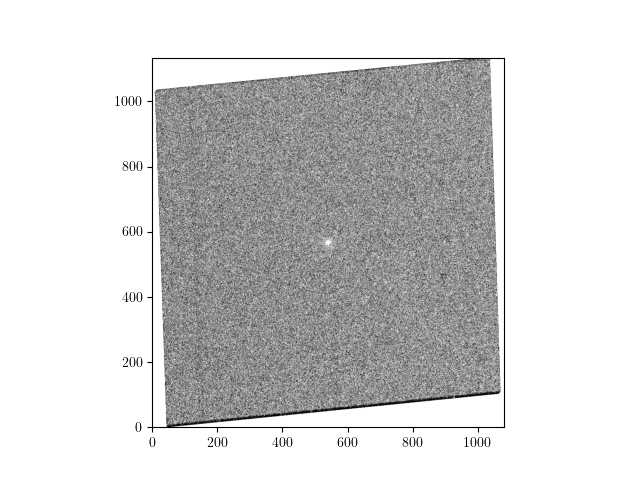

/Users/zgl12/Downloads/Muryel/hst_f665w.fits
(1135, 1081)
Wrote reprojected file to /Users/zgl12/Downloads/Muryel/hst_f665w_reproject.fits
Wrote reprojected data to /Users/zgl12/Downloads/Muryel/hst_f665w_reproject.txt
Wrote reprojected data to /Users/zgl12/Downloads/Muryel/hst_f665w_reproject.npy


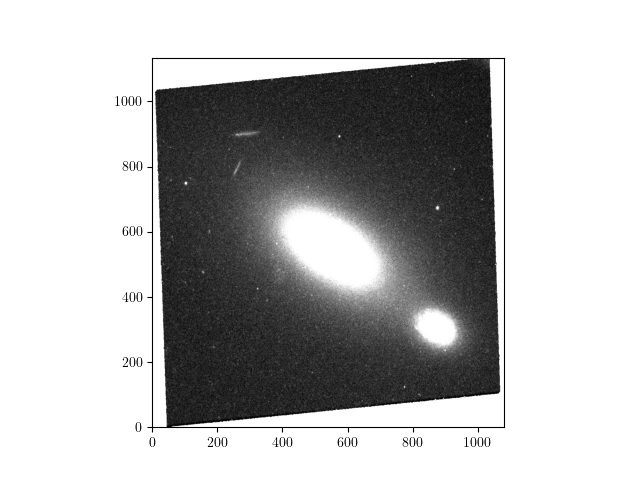

/Users/zgl12/Downloads/Muryel/jwst_f150w.fits
(1135, 1081)
Wrote reprojected file to /Users/zgl12/Downloads/Muryel/jwst_f150w_reproject.fits
Wrote reprojected data to /Users/zgl12/Downloads/Muryel/jwst_f150w_reproject.txt
Wrote reprojected data to /Users/zgl12/Downloads/Muryel/jwst_f150w_reproject.npy


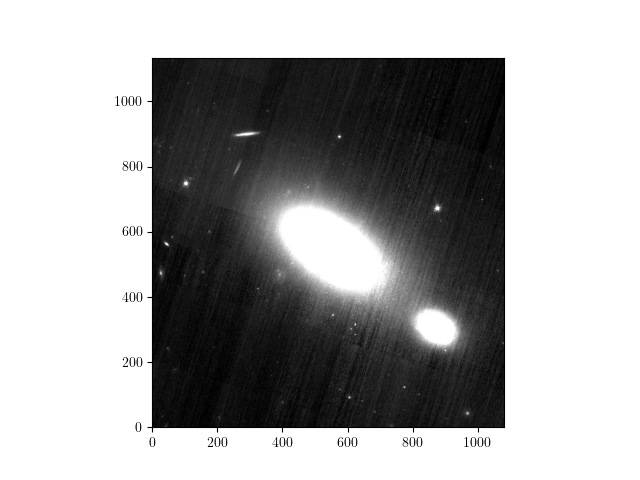

In [38]:
data_list = []
wcs_list = []

for i in range(len(files)):
    file = files[i]
    print(file)

    hdu = fits.open(file)
    header = hdu[1].header
    data = hdu[1].data
    wcs = WCS(header)
    hdu.close()
    
    if i != 0:
        data, footprint = reproject_exact((data, wcs), wcs_list[0], shape_out=data_list[0].shape)

    data_list.append(data)
    print(data.shape)
    
    wcs_list.append(wcs)
    
    new_path = file.replace('.fits', '_reproject.fits')
    hdu_new = fits.PrimaryHDU(data=data, header=wcs_list[0].to_header())
    hdu_new.writeto(new_path, overwrite=True)
    print(f'Wrote reprojected file to {new_path}')
    
    txt_path = file.replace('.fits', '_reproject.txt')
    np.savetxt(txt_path, data)
    print(f'Wrote reprojected data to {txt_path}')
    
    nummpy_array_path = file.replace('.fits', '_reproject.npy')
    np.save(nummpy_array_path, data)
    print(f'Wrote reprojected data to {nummpy_array_path}')
    
    # if i == 0:

    plt.figure()
    # ax = plt.subplot(projection=wcs)
    plt.imshow(data, origin='lower', cmap='gray', vmin=np.nanpercentile(data, 2), vmax=np.nanpercentile(data, 95))
    plt.show()
    
    # if i ==2:
    #     break

In [5]:
rgb = RGB(data_list,
          save = False, save_name = 'muryel', save_folder = '/Users/zgl12/', 
          epsf_plot=False, epsf = False,
          bkg_plot = False, temp_save = True, run = False, manual_override=80)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.4552949942013345].


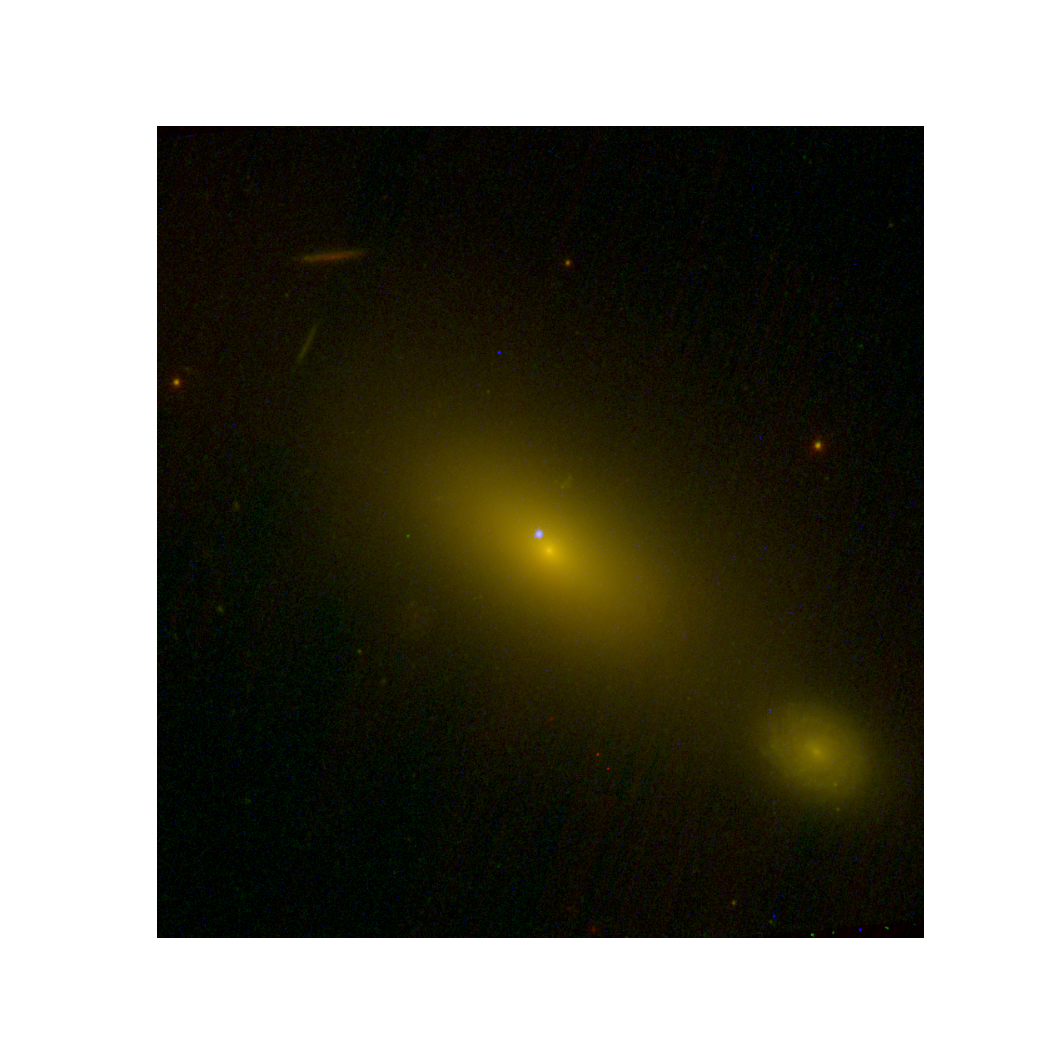

In [40]:
colour = rgb.master_plot(data_list, 
                         colours = ['blue', 'green', 'red'],
                         intensities = [0.5, 1, 0.6], 
                         gamma = [1.5, 0.55, 0.55],
                         norms = ['asinh', 'asinh', 'asinh'], 
                         uppers = [99.95, 99.8, 99.8],
                         lowers = [95, 30, 30], 
                         interactive=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.4552949942013345].


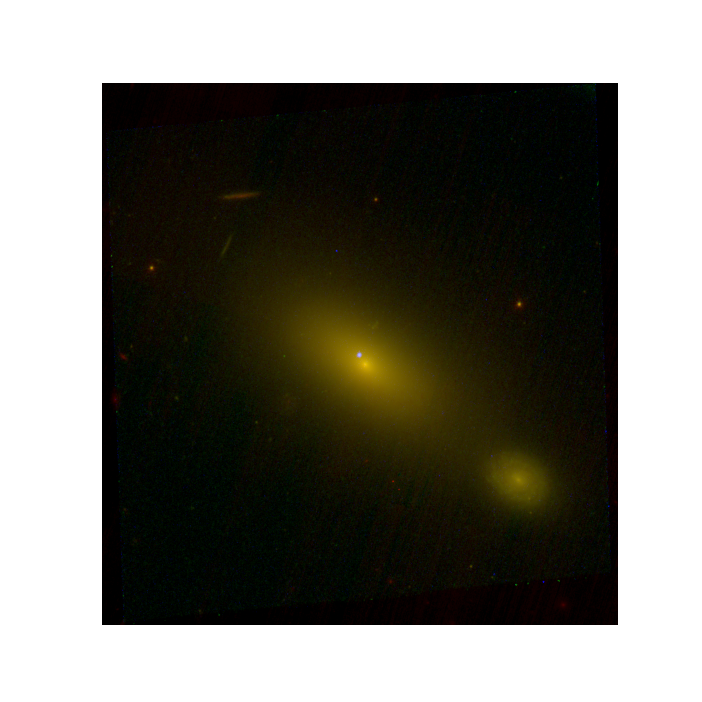

In [44]:
plt.figure(figsize=[fig_width_full, fig_width_full])
plt.imshow(colour, origin='lower')
plt.axis('off')
plt.savefig('/Users/zgl12/Downloads/muryel_rgb.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()